# 初始化参数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils   #第一部分，初始化
import reg_utils    #第二部分，正则化
import gc_utils     #第三部分，梯度校验
#%matplotlib inline #如果你使用的是Jupyter Notebook，请取消注释。
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X, train_Y, test_X, test_Y = init_utils.load_dataset(is_plot=True)

E:\pythonfile\coursera\2.Improving Deep Neural Networks\第一周 初始化、正则化\reg_utils.py:61: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
E:\pythonfile\coursera\2.Improving Deep Neural Networks\第一周 初始化、正则化\reg_utils.py:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


In [2]:
def model(X,Y,learning_rate=0.01,num_iterations=15000,print_cost=True,initialization="he",is_polt=True):
    """
    实现一个三层的神经网络：LINEAR ->RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID

    参数：
        X - 输入的数据，维度为(2, 要训练/测试的数量)
        Y - 标签，【0 | 1】，维度为(1，对应的是输入的数据的标签)
        learning_rate - 学习速率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每迭代1000次打印一次
        initialization - 字符串类型，初始化的类型【"zeros" | "random" | "he"】
        is_polt - 是否绘制梯度下降的曲线图
    返回
        parameters - 学习后的参数
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]

    #选择初始化参数的类型
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    else : 
        print("错误的初始化参数！程序退出")
        exit

    #开始学习
    for i in range(0,num_iterations):
        #前向传播
        a3 , cache = init_utils.forward_propagation(X,parameters)

        #计算成本        
        cost = init_utils.compute_loss(a3,Y)

        #反向传播
        grads = init_utils.backward_propagation(X,Y,cache)

        #更新参数
        parameters = init_utils.update_parameters(parameters,grads,learning_rate)

        #记录成本
        if i % 1000 == 0:
            costs.append(cost)
            #打印成本
            if print_cost:
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))


    #学习完毕，绘制成本曲线
    if is_polt:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    #返回学习完毕后的参数
    return parameters

## 初始化为0

In [3]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}

    L = len(layers_dims) #网络层数

    for l in range(1,L):
        parameters["W" + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters["b" + str(l)] = np.zeros((layers_dims[l],1))

        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))

    return parameters

第0次迭代，成本值为：0.6931471805599453
第1000次迭代，成本值为：0.6931471805599453
第2000次迭代，成本值为：0.6931471805599453
第3000次迭代，成本值为：0.6931471805599453
第4000次迭代，成本值为：0.6931471805599453
第5000次迭代，成本值为：0.6931471805599453
第6000次迭代，成本值为：0.6931471805599453
第7000次迭代，成本值为：0.6931471805599453
第8000次迭代，成本值为：0.6931471805599453
第9000次迭代，成本值为：0.6931471805599453
第10000次迭代，成本值为：0.6931471805599455
第11000次迭代，成本值为：0.6931471805599453
第12000次迭代，成本值为：0.6931471805599453
第13000次迭代，成本值为：0.6931471805599453
第14000次迭代，成本值为：0.6931471805599453


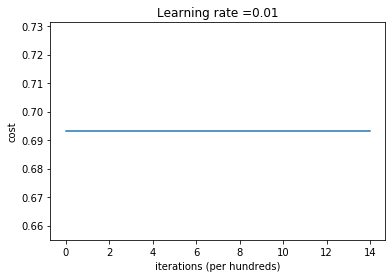

训练集:
Accuracy: 0.5
测试集:
Accuracy: 0.5


In [4]:
parameters = model(train_X, train_Y, initialization = "zeros",is_polt=True)
print ("训练集:")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print ("测试集:")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

## 随机初始化

In [5]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)               # 指定随机种子
    parameters = {}
    L = len(layers_dims)            # 层数

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) 
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))

    return parameters

第0次迭代，成本值为：1.9698193182646353
第1000次迭代，成本值为：0.6894749458317238
第2000次迭代，成本值为：0.675058063210226
第3000次迭代，成本值为：0.6469210868251527
第4000次迭代，成本值为：0.5398790761260324
第5000次迭代，成本值为：0.40626422697648484
第6000次迭代，成本值为：0.29844708868759445
第7000次迭代，成本值为：0.2218373466209485
第8000次迭代，成本值为：0.16926424179038072
第9000次迭代，成本值为：0.13413308969827087
第10000次迭代，成本值为：0.10873865543082417
第11000次迭代，成本值为：0.09169443068126971
第12000次迭代，成本值为：0.07991173603998081
第13000次迭代，成本值为：0.07083949901112584
第14000次迭代，成本值为：0.06370209022580517


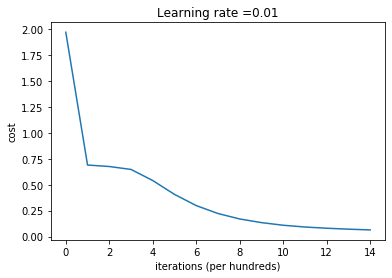

训练集:
Accuracy: 0.9966666666666667
测试集:
Accuracy: 0.96


In [6]:
parameters = model(train_X, train_Y, initialization = "random",is_polt=True)
print ("训练集:")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print ("测试集:")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

## 抑梯度异常初始化
我们会使用到$\sqrt{\frac{2}{\text{dimension of the previous layer}}}$这个公式来初始化参数

In [7]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)               # 指定随机种子
    parameters = {}
    L = len(layers_dims)            # 层数

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))

    return parameters

第0次迭代，成本值为：0.8830537463419761
第1000次迭代，成本值为：0.6879825919728063
第2000次迭代，成本值为：0.6751286264523371
第3000次迭代，成本值为：0.6526117768893807
第4000次迭代，成本值为：0.6082958970572938
第5000次迭代，成本值为：0.5304944491717495
第6000次迭代，成本值为：0.41386458170717944
第7000次迭代，成本值为：0.31178034648444414
第8000次迭代，成本值为：0.23696215330322556
第9000次迭代，成本值为：0.18597287209206828
第10000次迭代，成本值为：0.15015556280371808
第11000次迭代，成本值为：0.12325079292273544
第12000次迭代，成本值为：0.09917746546525927
第13000次迭代，成本值为：0.08457055954024272
第14000次迭代，成本值为：0.07357895962677359


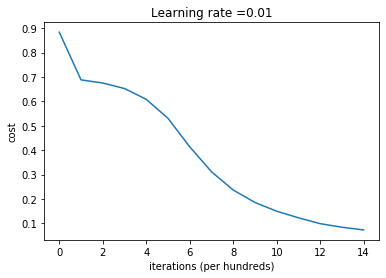

训练集:
Accuracy: 0.9933333333333333
测试集:
Accuracy: 0.96


In [8]:
parameters = model(train_X, train_Y, initialization = "he",is_polt=True)
print("训练集:")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集:")
init_utils.predictions_test = init_utils.predict(test_X, test_Y, parameters)

# 正则化
为了避免过拟合的问题

In [9]:
train_X, train_Y, test_X, test_Y = reg_utils.load_2D_dataset(is_plot=False)

In [10]:
def model(X,Y,learning_rate=0.3,num_iterations=30000,print_cost=True,is_plot=True,lambd=0,keep_prob=1):
    """
    实现一个三层的神经网络：LINEAR ->RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID

    参数：
        X - 输入的数据，维度为(2, 要训练/测试的数量)
        Y - 标签，【0(蓝色) | 1(红色)】，维度为(1，对应的是输入的数据的标签)
        learning_rate - 学习速率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每迭代10000次打印一次，但是每1000次记录一个成本值
        is_polt - 是否绘制梯度下降的曲线图
        lambd - 正则化的超参数，实数
        keep_prob - 随机删除节点的概率
    返回
        parameters - 学习后的参数
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],20,3,1]

    #初始化参数
    parameters = reg_utils.initialize_parameters(layers_dims)

    #开始学习
    for i in range(0,num_iterations):
        #前向传播
        ##是否随机删除节点
        if keep_prob == 1:
            ###不随机删除节点
            a3 , cache = reg_utils.forward_propagation(X,parameters)
        elif keep_prob < 1:
            ###随机删除节点
            a3 , cache = forward_propagation_with_dropout(X,parameters,keep_prob)
        else:
            print("keep_prob参数错误！程序退出。")
            exit

        #计算成本
        ## 是否使用二范数
        if lambd == 0:
            ###不使用L2正则化
            cost = reg_utils.compute_cost(a3,Y)
        else:
            ###使用L2正则化
            cost = compute_cost_with_regularization(a3,Y,parameters,lambd)

        #反向传播
        ##可以同时使用L2正则化和随机删除节点，但是本次实验不同时使用。
        assert(lambd == 0  or keep_prob ==1)

        ##两个参数的使用情况
        if (lambd == 0 and keep_prob == 1):
            ### 不使用L2正则化和不使用随机删除节点
            grads = reg_utils.backward_propagation(X,Y,cache)
        elif lambd != 0:
            ### 使用L2正则化，不使用随机删除节点
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            ### 使用随机删除节点，不使用L2正则化
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)

        #更新参数
        parameters = reg_utils.update_parameters(parameters, grads, learning_rate)

        #记录并打印成本
        if i % 1000 == 0:
            ## 记录成本
            costs.append(cost)
            if (print_cost and i % 10000 == 0):
                #打印成本
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))

    #是否绘制成本曲线图
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (x1,000)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    #返回学习后的参数
    return parameters

## 不使用正则化

第0次迭代，成本值为：0.6557412523481002
第10000次迭代，成本值为：0.1632998752572419
第20000次迭代，成本值为：0.13851642423259686


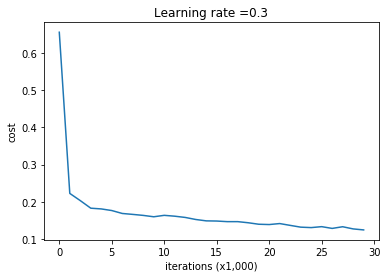

训练集:
Accuracy: 0.9478672985781991
测试集:
Accuracy: 0.915


In [11]:
parameters = model(train_X, train_Y,is_plot=True)
print("训练集:")
predictions_train = reg_utils.predict(train_X, train_Y, parameters)
print("测试集:")
predictions_test = reg_utils.predict(test_X, test_Y, parameters)

## L2正则化

避免过度拟合的标准方法称为L2正则化，它包括适当修改你的成本函数，从:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
到:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$


In [12]:
def compute_cost_with_regularization(A3,Y,parameters,lambd):
    """
    实现公式2的L2正则化计算成本

    参数：
        A3 - 正向传播的输出结果，维度为（输出节点数量，训练/测试的数量）
        Y - 标签向量，与数据一一对应，维度为(输出节点数量，训练/测试的数量)
        parameters - 包含模型学习后的参数的字典
    返回：
        cost - 使用公式2计算出来的正则化损失的值

    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    cross_entropy_cost = reg_utils.compute_cost(A3,Y)

    L2_regularization_cost = lambd * (np.sum(np.square(W1)) + np.sum(np.square(W2))  + np.sum(np.square(W3))) / (2 * m)

    cost = cross_entropy_cost + L2_regularization_cost

    return cost

#当然，因为改变了成本函数，我们也必须改变向后传播的函数， 所有的梯度都必须根据这个新的成本值来计算。

def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    实现我们添加了L2正则化的模型的后向传播。

    参数：
        X - 输入数据集，维度为（输入节点数量，数据集里面的数量）
        Y - 标签，维度为（输出节点数量，数据集里面的数量）
        cache - 来自forward_propagation（）的cache输出
        lambda - regularization超参数，实数

    返回：
        gradients - 一个包含了每个参数、激活值和预激活值变量的梯度的字典
    """

    m = X.shape[1]

    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y

    dW3 = (1 / m) * np.dot(dZ3,A2.T) + ((lambd * W3) / m )
    db3 = (1 / m) * np.sum(dZ3,axis=1,keepdims=True)

    dA2 = np.dot(W3.T,dZ3)
    dZ2 = np.multiply(dA2,np.int64(A2 > 0))
    dW2 = (1 / m) * np.dot(dZ2,A1.T) + ((lambd * W2) / m)
    db2 = (1 / m) * np.sum(dZ2,axis=1,keepdims=True)

    dA1 = np.dot(W2.T,dZ2)
    dZ1 = np.multiply(dA1,np.int64(A1 > 0))
    dW1 = (1 / m) * np.dot(dZ1,X.T) + ((lambd * W1) / m)
    db1 = (1 / m) * np.sum(dZ1,axis=1,keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

第0次迭代，成本值为：0.6974484493131264
第10000次迭代，成本值为：0.2684918873282239
第20000次迭代，成本值为：0.26809163371273004


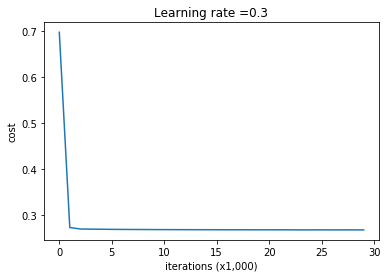

使用正则化，训练集:
Accuracy: 0.9383886255924171
使用正则化，测试集:
Accuracy: 0.93


In [13]:
parameters = model(train_X, train_Y, lambd=0.7,is_plot=True)
print("使用正则化，训练集:")
predictions_train = reg_utils.predict(train_X, train_Y, parameters)
print("使用正则化，测试集:")
predictions_test = reg_utils.predict(test_X, test_Y, parameters)